<a href="https://colab.research.google.com/github/kohncory/Teaching_R_Sample/blob/main/FA24_Lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BIOL 175 - Colab 5 (Chapter 4)
# Describing data

This file, made by Dr. Cory Kohn (Scripps and Pitzer Colleges), was originally based on tutorial 5 for the Analysis of Biological Data Labs available [here](https://whitlockschluter3e.zoology.ubc.ca/RLabs/R_tutorial_Describing_data.html).

###Learning outcomes:
*   Investigate sampling error; see that larger samples have less sampling error.
*   Visualize confidence intervals.
*   Calculate basic summary statistics using R.
*   Calculate confidence intervals for the mean with R.

## Learning the tools

### Missing data
Sometimes we do not have all variables measured on all individuals in the data set. When this happens, we need a space holder in our data files so that R knows that the data is missing. The standard way of doing this in R is to put “NA” (without the quotes) in the location that the data would have gone. NA is short for “not available”.

For example, in the Titanic data set, we do not know the age of several passengers. Let’s look at it. Load the Titanic data set after you have uploaded it to your session storage (see Lab 2, reading a file):

In [ ]:
titanicData <- read.csv("titanic.csv", stringsAsFactors = TRUE)

Have R print out the list of the age variable, which you can do by just typing its name:

In [ ]:
titanicData$age

[1] 29.0000  2.0000 30.0000 25.0000  0.9167 47.0000 63.0000 39.0000 58.0000
  [10] 71.0000 47.0000 19.0000      NA      NA      NA 50.0000 24.0000 36.0000
  [19] 37.0000 47.0000 26.0000 25.0000 25.0000 19.0000 28.0000 45.0000 39.0000
  [28] 30.0000 58.0000      NA 45.0000 22.0000      NA 41.0000 48.0000      NA
  [37] 44.0000 59.0000 60.0000 45.0000      NA 53.0000 58.0000 36.0000 33.0000
  [46]      NA      NA 36.0000 36.0000 14.0000 11.0000 49.0000      NA 36.0000
  [55]      NA 46.0000 47.0000 27.0000 31.0000      NA      NA      NA      NA
  [64] 27.0000 26.0000      NA      NA 64.0000 37.0000 39.0000 55.0000      NA
  [73] 70.0000 69.0000 36.0000 39.0000 38.0000      NA 27.0000 31.0000 27.0000
  [82]      NA 31.0000 17.0000      NA      NA  4.0000 27.0000 50.0000 48.0000
  [91] 49.0000 48.0000 39.0000 23.0000 53.0000 36.0000      NA      NA 30.0000
 [100] 24.0000 19.0000 28.0000 23.0000 64.0000 60.0000      NA 49.0000      NA
 [109] 44.0000 22.0000 60.0000 48.0000 37.0000 35.0000 47.0000 22.0000 45.0000
 [118] 49.0000      NA 71.0000 54.0000 38.0000 19.0000 58.0000 45.0000 23.0000
 [127] 46.0000 25.0000 21.0000 48.0000 49.0000 45.0000 36.0000      NA 55.0000
 [136] 52.0000 24.0000      NA      NA      NA 16.0000 44.0000 51.0000 42.0000
 [145] 35.0000 35.0000 38.0000 35.0000      NA 50.0000 49.0000 46.0000      NA
 [154] 58.0000 41.0000      NA 42.0000 40.0000      NA      NA      NA 42.0000
 [163] 55.0000 50.0000 16.0000      NA 29.0000 21.0000 30.0000 15.0000 30.0000
 [172]      NA      NA      NA 46.0000 54.0000 36.0000 28.0000      NA 65.0000
 [181] 33.0000 44.0000 37.0000      NA 55.0000 47.0000 36.0000 58.0000 31.0000
 [190] 23.0000 19.0000 64.0000      NA 64.0000 22.0000 28.0000      NA      NA
 [199] 22.0000      NA      NA 18.0000 17.0000 52.0000 46.0000 56.0000      NA
 [208]      NA 43.0000 31.0000      NA      NA 33.0000      NA 27.0000 55.0000
 [217] 54.0000      NA 61.0000 48.0000 18.0000 13.0000 21.0000      NA      NA
 [226]      NA 34.0000 40.0000 36.0000 50.0000 39.0000 56.0000 28.0000 56.0000
 [235] 56.0000 24.0000 18.0000      NA 24.0000 23.0000 45.0000 40.0000  6.0000
 [244] 57.0000      NA 32.0000 62.0000 54.0000 43.0000 52.0000      NA 62.0000
 [253] 67.0000 63.0000 61.0000 46.0000 52.0000 39.0000 18.0000 48.0000      NA
 [262] 49.0000 39.0000 17.0000 46.0000      NA 31.0000      NA 61.0000 47.0000
 [271] 64.0000 60.0000 60.0000 55.0000 54.0000 21.0000 57.0000 45.0000 31.0000
 [280] 50.0000 50.0000 27.0000 20.0000 51.0000      NA 21.0000      NA      NA
 [289] 36.0000      NA      NA      NA      NA      NA      NA      NA      NA
 [298]      NA      NA      NA      NA      NA      NA      NA      NA      NA
 [307] 40.0000      NA      NA 32.0000      NA      NA      NA      NA      NA
 [316]      NA 33.0000      NA      NA      NA      NA      NA 30.0000 28.0000
 [325] 18.0000      NA 34.0000 32.0000 57.0000 18.0000 23.0000 36.0000 28.0000
 [334] 51.0000 32.0000 19.0000 28.0000 36.0000  4.0000  1.0000 12.0000 34.0000
 [343] 19.0000 23.0000 26.0000      NA 27.0000 15.0000 45.0000 40.0000 20.0000
 [352] 25.0000 36.0000 25.0000      NA 42.0000 26.0000 26.0000  0.8333 31.0000
 [361]      NA 19.0000 54.0000 44.0000 52.0000 30.0000 30.0000      NA      NA
 [370] 29.0000      NA 29.0000 27.0000 24.0000 35.0000 31.0000  8.0000 22.0000
 [379] 30.0000      NA 20.0000      NA 21.0000 49.0000  8.0000 28.0000 18.0000
 [388]      NA 28.0000 22.0000 25.0000 18.0000 32.0000 18.0000      NA 42.0000
 [397] 34.0000  8.0000      NA      NA 23.0000 21.0000 19.0000      NA      NA
 [406]      NA 38.0000      NA 38.0000 35.0000 35.0000 38.0000 24.0000 16.0000
 [415] 26.0000 45.0000 24.0000 21.0000 22.0000      NA 34.0000 30.0000 50.0000
 [424] 30.0000 23.0000  1.0000 44.0000 28.0000  6.0000 30.0000      NA 43.0000
 [433] 45.0000  7.0000 24.0000 24.0000 49.0000 48.0000      NA 34.0000 32.0000
 [442] 21.0000 18.0000 53.0000 23.0000 21.0000      NA 52.0000 42.0000 36.0000
 [451] 21.0000 41.0000      NA      NA 33.0000 17.000

If you look through the results, you will see that most individuals have numbers in this list, but some have NA. These NAs are the people for which we do not have age information.

By the way, the titanic.csv file simply has nothing in the places where there is missing data. When R loaded it, it replaced the empty spots with NA automatically.

### Measures of location
This week we want to use R to give some basic descriptive statistics for numerical data.

#### mean()
We have already seen in lab 1 how to calculate the mean of a vector of data using **`mean()`**. Unfortunately, if there are missing data we need to tell R how to deal with it.

A (somewhat annoying) quirk of R is that if we try to take the mean of a list of numbers that include missing data, we get an NA for the result!

In [ ]:
mean(titanicData$age)

[1] NA

#### na.rm = TRUE
To get the mean of all the numbers that we do have, we have to add an option to the mean() function. This option is **`na.rm = TRUE`**.

In [ ]:
mean(titanicData$age, na.rm = TRUE)

[1] 31.19418

This tells R to remove (“**`rm`**”) the NAs before taking the mean. It turns out that the mean age of passengers that we have information for was about 31.2.

**`na.rm = TRUE`** can be added to many functions in R, including...

#### median()
The median of a series of numbers is the “middle” number – half of the numbers in the list are greater the median and half are below it. It can be calculated in R by using **`median()`**.

In [ ]:
median(titanicData$age, na.rm = TRUE)

[1] 30

#### summary()
A handy function that will return both the mean and median at the same time (along with other information such as the first and third quartiles) is **`summary()`**.

In [ ]:
summary(titanicData$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.1667 21.0000 30.0000 31.1942 41.0000 71.0000     680 

From left to right, this output gives us the smallest (minimum) value in the list (“**`Min.`**”), the first quartile (“**`1st Qu.`**”), the median, the mean, the third quartile (“**`3rd Qu.`**”), the largest (maximum) value (“**`Max.`**”), and finally, the number of individuals with missing values (”**`NA’s`**”).

The first quartile is the value in the data that is larger than a quarter of the data points. The third quartile is larger than three quarters of the data. These are also called the 25th percentile and the 75th percentile, respectively. (You may remember these from boxplots, where the top and bottom of the box mark the 75th and 25th percentiles, respectively.)

### Measures of variability
R can also calculate measures of the variability of a set of data.

#### var()
To calculate the variance of a list of numbers, use **`var()`**.

In [ ]:
var(titanicData$age, na.rm = TRUE)

[1] 217.4895

Note that **`var()`**, as well as **`sd()`** below, have the same need for **`na.rm = TRUE`** when analyzing data that include missing values.

#### sd()
The standard deviation can be calculated by **`sd()`**.

In [ ]:
sd(titanicData$age, na.rm = TRUE)

[1] 14.74753

Of course, the standard deviation is the same as the square root of the variance. We can assign each calculation method to a variable and test their equality with **`==`**:

In [ ]:
sd1_titanicDataAge <- sd(titanicData$age, na.rm = TRUE)
sd2_titanicDataAge <- sqrt(var(titanicData$age, na.rm = TRUE))
sd1_titanicDataAge == sd2_titanicDataAge # Here we are testing this equality; if they are equivalent values then the output is TRUE

[1] TRUE

#### Coefficient of variation
Surprisingly, there is no standard function in R to calculate the coefficient of variation. You can do this yourself, though, directly from the definition:

In [ ]:
100 * sd1_titanicDataAge / mean(titanicData$age, na.rm = TRUE)

[1] 47.27653

#### IQR()
The interquartile range (or IQR) is the difference between the third quartile and the first quartile; in other words the range covered by the middle half of the data. It can be calculated with **`IQR()`**.

In [ ]:
IQR(titanicData$age, na.rm = TRUE)

[1] 20

Note we could have calculated the IQR from the results of **`summary()`** above. The third quartile is 41 and the first quartile is 21, so the difference is 41 – 21 = 20.

We can use indexing with brackets **`[]`** specifying the values within a vector to do this calculation using **`summary()`**. Converting data types is a final flourish so the result is simply 20.

In [ ]:
summary(titanicData$age)[2]
summary(titanicData$age)[5]
iqr_titanicdataAge <-summary(titanicData$age)[5] - summary(titanicData$age)[2]
iqr_titanicdataAge # prints the "double" data type with the erroneous "3rd Qu." identifier
as.integer(iqr_titanicdataAge) # converting data types from double to integer

1st Qu. 
     21 

3rd Qu. 
     41 

3rd Qu. 
     20 

[1] 20

### Confidence intervals of the mean
The confidence interval for an estimate tells us a range of values that is likely to contain the true value of the parameter. For example, in 95% of random samples the 95% confidence interval of the mean will contain the true value of the mean.

R does not have a simple built-in function to calculate only the confidence interval of the mean, but the function that calculates t-tests will give us this information. (See chapters 11 and 12 in the text or Labs 7 and 8 for more on t-tests.) The function **`t.test()`** has many results in its output. By adding **`$conf.int`** to this function we only return the confidence interval for the mean. By default it gives us the 95% confidence interval.

In [ ]:
t.test(titanicData$age)$conf.int

[1] 30.04312 32.34524
attr(,"conf.level")
[1] 0.95

As the result above shows, the 95% confidence interval of the mean for age in the `titanicData` data set is from about 30.0 to 32.3. (The confidence interval is not so useful in this case, because we actually have information for nearly all the individuals on the Titanic.)

To calculate confidence intervals with a different level of confidence, we can add the option `conf.level` to the `t.test()` function. For example, for a 99% confidence interval we can use the following:

In [ ]:
t.test(titanicData$age, conf.level = 0.99)$conf.int

[1] 29.67976 32.70861
attr(,"conf.level")
[1] 0.99

## R commands summary
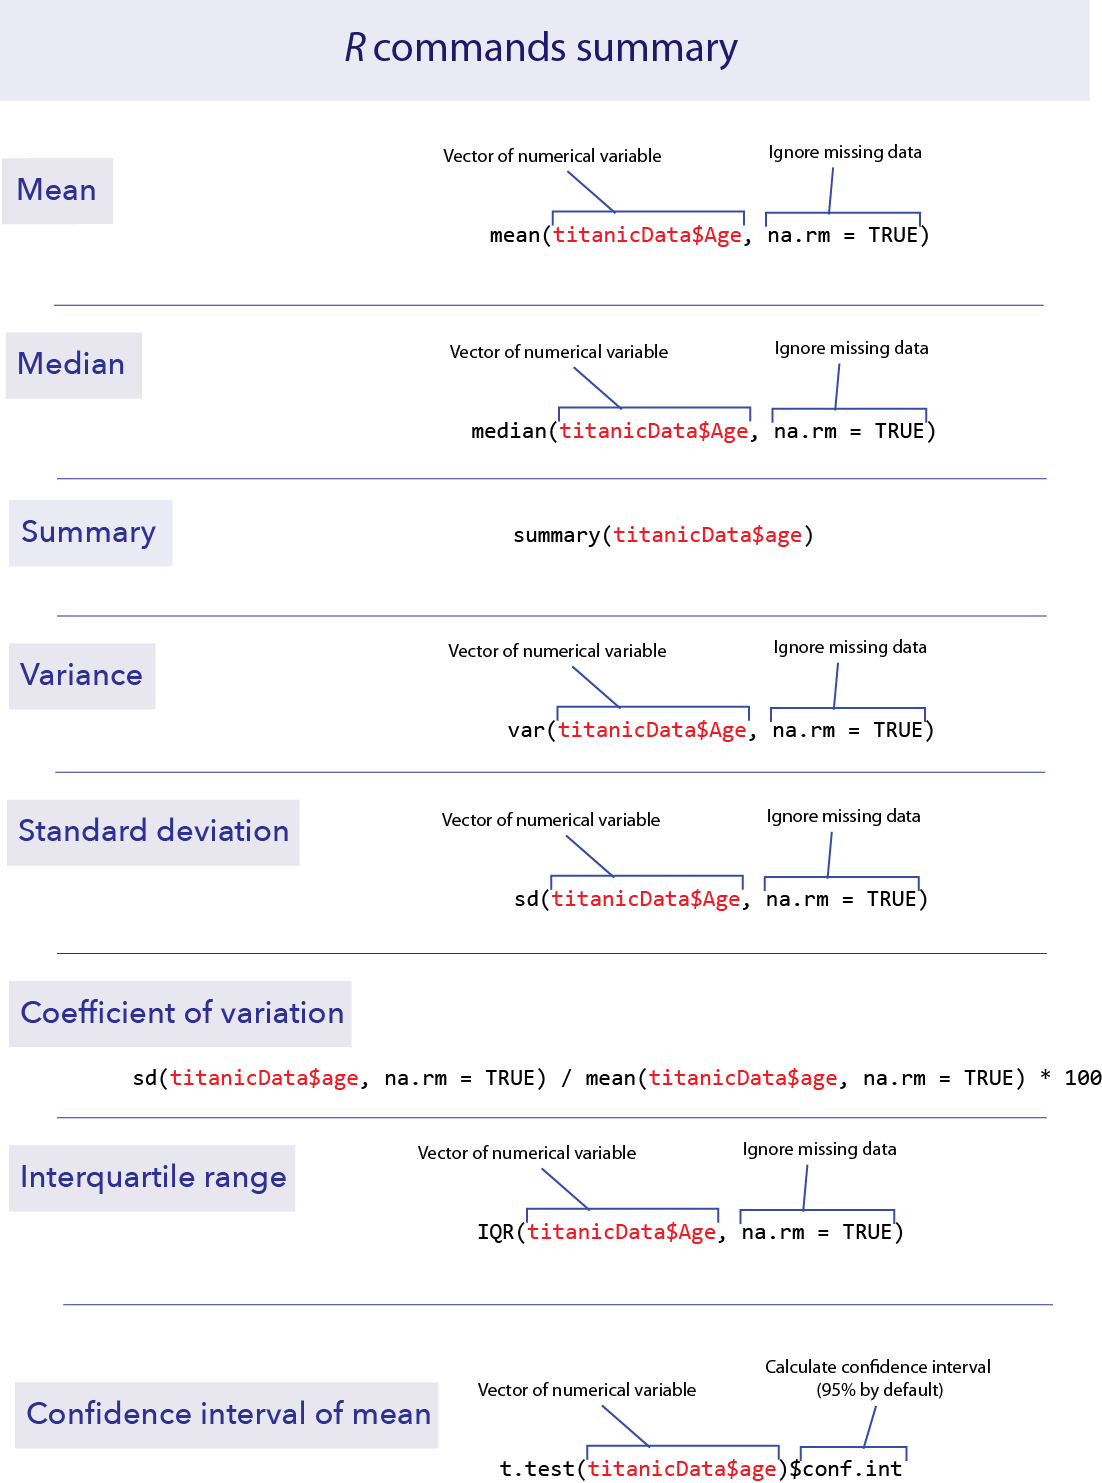

## Activities -- *recommend you **do** complete outside of class time*

### Distribution of sample means
Go to http://www.zoology.ubc.ca/~whitlock/kingfisher/SamplingNormal.htm. This page contains some interactive visualizations that let you play around with sampling to see the distribution of sampling means. Click the button that says “Tutorial” near the bottom of the page and follow along with the instructions.

### Confidence intervals
Go to http://www.zoology.ubc.ca/~whitlock/kingfisher/CIMean.htm. This applet draws confidence intervals for the mean of a known population. Click “Tutorial” and follow along.

## Questions
For each lab, add new code **and** text boxes (or **`#`**-marked comments within code boxes) to the bottom and/or within the tutorial to practice the activities.

1.   Use the data file "StatsStudentDataFA24.csv" which includes data that your classmates collected on themselves during the first week of class. Remember that these data were collected using specific devices (i.e., measuring tapes and/or rulers based in inches and centimeters), but the data file asked for the measurements in centimenters or millimeters. Import the file into R.

*   Use **`summary()`** to inspect the data on bicep circumference for the class. Note anything suspect you find, if anything.

*   Plot the distribution of bicep circumference. Describe the shape of the distribution. Is it symmetric or strongly skewed? Is it unimodal or bimodal? Remember that a distribution is skewed if it is asymmetric. A distribution is skewed right if there is a long tail to the right, and skewed left if there is a long tail to the left.

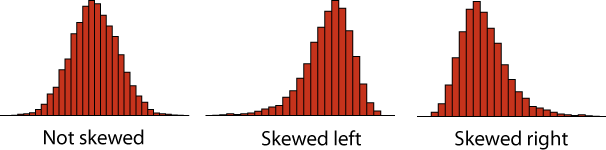

*    Are there any outliers that look as though a student used the wrong units for their bicep circumference measurement. For example, are there any values that are more plausibly a circumference given in inches rather than the requested centimeters? Or, are there any outliers that are otherwise unexplainable but highly suspicious. If so, and if this is not likely to be an accurate description of an individual in your class, use **`filter()`** from the package **`dplyr`** to create a new data set without those rows.
*    Use R to calculate the mean bicep circumference of all students in the class, using the filtered data.
*   Use **`sd()`** to calculate the standard deviation of bicep circumference, using the filtered data.

2.   The file “caffeine.csv” contains data on the amount of caffeine in a 16 oz. cup of coffee obtained from various vendors. For context, doses of caffeine over 25 mg are enough to increase anxiety in some people, and doses over 300 to 360 mg are enough to significantly increase heart rate in most people; the recommended daily maximum intake is 400 mg. A can of Red Bull contains 80 mg of caffeine and a Celsius contains 200 mg.

*   What is the mean amount of caffeine in 16 oz. coffees?

*   What is the 95% confidence interval for the mean?

*   Plot the frequency distribution of caffeine levels for these data in a histogram. Is the amount of caffeine in a cup of coffee relatively consistent from one vendor to another? What is the standard deviation of caffeine level? What is the coefficient of variation?

*   The file “caffeineStarbucks.csv” has data on six 16 oz. cups of Breakfast Blend coffee sampled on six different days from a Starbucks location. Calculate the mean and the 95% confidence interval for the mean for these data. Compare these results to the data taken on the broader sample of vendors in the first file. Describe the difference.

3.   A confidence interval is a range of values that are likely to contain the true value of a parameter. Consider the “caffeine.csv” data again.

*   Calculate the 99% confidence interval for the mean caffeine level.

*   Compare this 99% confidence interval to the 95% confidence interval you calculate in question 2b. Which confidence interval is wider (i.e., spans a broader range)? Why should this one be wider?

*   Let’s compare the quantiles of the distribution of caffeine to this confidence interval. Approximately 95% of the data values should fall between the 2.5% and 97.5% quantiles of the distribution of caffeine. We can use R to calculate the 2.5% and 97.5% quantiles with a command like the following. (Replace “datavector” with the name of the vector of your caffeine data.)

```
quantile(datavector, c(0.025, 0.975), na.rm =TRUE)
```
Are these the same as the boundaries of the 95% confidence interval? If not, why not? Which should bound a smaller region, the quantile or the confidence interval of the mean?

4.   Return to the class data set "StatsStudentDataFA24.csv”. Find the mean value of “number of siblings.” Add one to this to find the mean number of children per family in the class.

*   The mean number of offspring per family twenty years ago was about 2. Is the value for this class similar, greater, or smaller? If different, think of reasons for the difference.

*   Are the families represented in this class systematically different from the population at large? Is there a potential sampling bias? What effect does this have on the estimated mean family size of all couples?

5.   Return to the data on countries of the world, in “countries.csv”. Plot the distributions for `ecological_footprint_2000`, `cell_phone_subscriptions_per_100_people_2012`, and `life_expectancy_at_birth_female`.

*   For each variable, plot a histogram of the distribution. Is the variable skewed? If so, in which direction?

*   For each variable, calculate the mean and median. Are they similar? Match the difference in mean and median to the direction of skew on the histogram. Do you see a pattern?